# Playing with PyTorch

<b>_A lot_</b> easier than Tensorflow but still not as slick as numpy I or whatever I'm imagining in my head. I guess I just dislike having to constantly dealing with typing.

In [1]:
import numpy as np
import scipy.stats as stats
import sklearn.linear_model as lms
import matplotlib.pyplot as graph
from tqdm import tqdm
from sklearn.metrics import r2_score, mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as fx
from torch.autograd import Variable

from Helpers import vec_to_array
 
graph.style.use('fivethirtyeight')

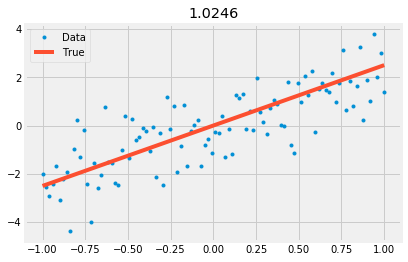

In [2]:
x = np.linspace(-1.0, 1.0, 100)
y = 2.5 * x + stats.norm.rvs(size=x.shape)

x, y = vec_to_array(x), vec_to_array(y)

graph.title(mean_squared_error(y, 2.5*x).round(4))
graph.plot(x, y, '.', label='Data')
graph.plot(x, 2.5*x, label='True')
graph.legend()
graph.show()

# SKLearn

In [3]:
lm = lms.LinearRegression().fit(x, y)
print(lm.coef_, lm.intercept_)

[[2.20945675]] [-0.10411868]


# PyTorch

In [4]:
dtype = torch.FloatTensor
y_torch, x_torch = torch.from_numpy(y), torch.from_numpy(x)

y_torch = Variable(y_torch, requires_grad=False).type(dtype)
x_torch = Variable(x_torch, requires_grad=False).type(dtype)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.node = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x_in):
        return self.node(x_in)  

In [5]:
((y_torch - (2.5 * x_torch)) ** 2).mean().data.numpy()

array([1.0246387], dtype=float32)

In [6]:
model = Model()
loss_func = nn.MSELoss()
learning_rate = 1e-2
tolerance = 1e-8
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_last = 1e6

train_loop = tqdm(range(2500))
for i in train_loop:
    i+=1
    y_hat = model(x_torch)
    
    # Compute fit
    mse_i = loss_func(y_hat, y_torch)
    train_loop.set_description(f'{i} -> {mse_i.data[0]}')    
    
    # Early termination condition
    if ((mse_last - mse_i) < tolerance).data.numpy():
        break
    mse_last = mse_i.data[0]
    
    # Zero the gradients before computing backprop
    optimiser.zero_grad()
    mse_i.backward()
    
    # NOTE: You can update the weights anyway you want!
    # Example here http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-nn 
    # For now I'm just going to use Adam
    optimiser.step()

_ = [print(w.data.numpy()) for w in model.parameters()]

480 -> 0.9850990772247314:  19%|█▉        | 476/2500 [00:01<00:05, 381.29it/s]

[[2.2046196]]
[-0.10411867]


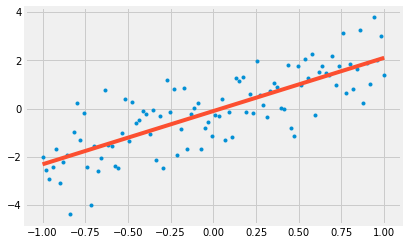

In [7]:
graph.plot(x_torch.data.numpy(), y_torch.data.numpy(), '.')
graph.plot(x_torch.data.numpy(), model(x_torch).data.numpy())
graph.show()